### Initialization

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import numpy as np
# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 


sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'

# Define study
STUDY_NAME = "opt_flathv_75_1500_withBB_chroma15_eol_bbb_2228_alt"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/base_collider/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/base_collider/xtrack_0004/config.yaml"


# Alternative study with chroma 15
STUDY_NAME_2 = "opt_flathv_75_1500_withBB_chroma15_eol_bbb_2228"
PARQUET_PATH_2 = f"../../scans/{STUDY_NAME_2}/da.parquet"
CONF_MAD_PATH_2 = f"../../scans/{STUDY_NAME_2}/base_collider/config.yaml"
CONF_COLLIDER_PATH_2 = f"../../scans/{STUDY_NAME_2}/base_collider/xtrack_0004/config.yaml"


SAVE_STUDY_EOS = False


### Load data

In [2]:
# Load dataframe
df = pd.read_parquet(PARQUET_PATH)
df_2 = pd.read_parquet(PARQUET_PATH_2)

# Round all numbers to 3 decimals
df = df.round(3)
df_2 = df_2.round(3)
df

normalized amplitude in xy-plane      qx     qy   dqx   dqy  \
beam  i_bunch_b1                                                                
lhcb1 0                                      7.469  62.313  60.32  15.0  15.0   
      1                                      6.844  62.313  60.32  15.0  15.0   
      2                                      7.188  62.313  60.32  15.0  15.0   
      3                                      7.062  62.313  60.32  15.0  15.0   
      4                                      6.500  62.313  60.32  15.0  15.0   
...                                            ...     ...    ...   ...   ...   
      3066                                   6.125  62.313  60.32  15.0  15.0   
      3067                                   5.688  62.313  60.32  15.0  15.0   
      3068                                   6.406  62.313  60.32  15.0  15.0   
      3430                                   6.281  62.313  60.32  15.0  15.0   
      3431                                   6.406  62.313  60.32  15.0  15.0   

                  i_bunch_b1  i_bunch_b2  num_particles_per_bunch  
beam  i_bunch_b1                                                   
lhcb1 0                  0.0      1144.0             1.316653e+11  
      1                  1.0      1144.0             1.316653e+11  
      2                  2.0      1144.0             1.316653e+11  
      3                  3.0      1144.0             1.316653e+11  
      4                  4.0      1144.0             1.316653e+11  
...                      ...         ...                      ...  
      3066            3066.0      1144.0             1.316653e+11  
      3067            3067.0      1144.0             1.316653e+11  
      3068            3068.0      1144.0             1.316653e+11  
      3430            3430.0      1144.0             1.316653e+11  
      3431            3431.0      1144.0             1.316653e+11  

[574 rows x 8 columns]

In [3]:
# Get the list of bunch families
fname = "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/master_jobs/filling_scheme/25ns_2228b_2216_1686_2112_hybrid_8b4e_2x56b_25ns_3x48b_12inj_with_identical_bunches.json"
with open(fname, "r") as fid:
    filling = json.load(fid)
l_families = filling["beam1_identical_bunches"]
dic_identical_bunches = {}
for family in l_families:
    dic_identical_bunches[family[0]] = family[1:]

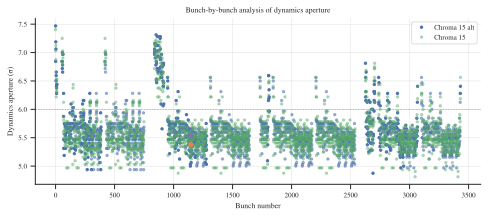

In [4]:
fig = plt.figure(figsize=(8, 3))

plt.plot(df["i_bunch_b1"], df["normalized amplitude in xy-plane"], ".", color = "C0", label = "Chroma 15 alt")
plt.plot(df["i_bunch_b1"], df_2["normalized amplitude in xy-plane"], ".", color = "C2", label = "Chroma 15", alpha = 0.4)

for bunch, DA in zip(df["i_bunch_b1"], df["normalized amplitude in xy-plane"]):
    if bunch in dic_identical_bunches and len(dic_identical_bunches[bunch]) > 0:
        plt.plot(dic_identical_bunches[bunch], [DA]*len(dic_identical_bunches[bunch]), ".", color = "C0", alpha = 0.5)
    else:
        pass
    
for bunch, DA in zip(df["i_bunch_b1"], df_2["normalized amplitude in xy-plane"]):
    if bunch in dic_identical_bunches and len(dic_identical_bunches[bunch]) > 0:
        plt.plot(dic_identical_bunches[bunch], [DA]*len(dic_identical_bunches[bunch]), ".", color = "C2", alpha = 0.4)
    else:
        pass
    
    
plt.axhline(6, color = "C1", linestyle = "--")
plt.scatter(x = [1147], y = df[df["i_bunch_b1"]==1147]["normalized amplitude in xy-plane"].values, color = "C1", s = 20, zorder= 10)
plt.scatter(x = [1147], y = df_2[df_2["i_bunch_b1"]==1147]["normalized amplitude in xy-plane"].values, color = "C4", s = 20, zorder= 10)

#plt.scatter(x = [58], y = df[df["i_bunch_b1"]==58]["normalized amplitude in xy-plane"].values, color = "C1", s = 20, zorder= 10)
#plt.scatter(x = [952], y = df[df["i_bunch_b1"]==952]["normalized amplitude in xy-plane"].values, color = "C1", s = 20, zorder= 10)

#analysis_functions.add_QR_code(fig, "https://cernbox.cern.ch/s/CwDVLUpLRwCQF0S")
plt.grid()
plt.xlabel("Bunch number")
plt.ylabel(r"Dynamics aperture ($\sigma$)")
plt.title("Bunch-by-bunch analysis of dynamics aperture")
plt.legend()
plt.savefig("DA_bbb_15_alt.pdf", bbox_inches='tight')
plt.show()

In [5]:
df[df["i_bunch_b1"]==950]["normalized amplitude in xy-plane"].values

array([6.375])

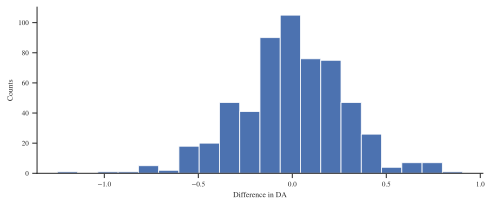

In [9]:
# Plot hist of differences

fig = plt.figure(figsize=(8, 3))
plt.xlabel("Difference in DA")
plt.ylabel("Counts")
plt.hist(df["normalized amplitude in xy-plane"] - df_2["normalized amplitude in xy-plane"], bins = 20)
plt.show()

### Save study on EOS

In [6]:
if SAVE_STUDY_EOS:
    path_archive, path_EOS = analysis_functions.copy_study_on_eos(STUDY_NAME, type_analysis="bbb")
    # analysis_functions.archive_and_clean(path_archive, path_EOS)